   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

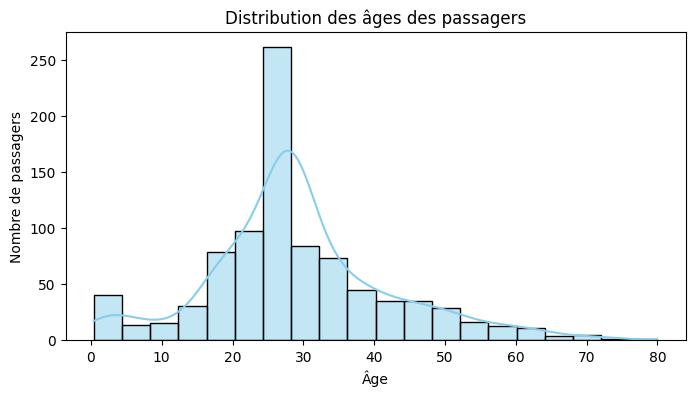

C:\Users\0203555F\AppData\Local\Temp\ipykernel_23872\4137324840.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette="Set2")


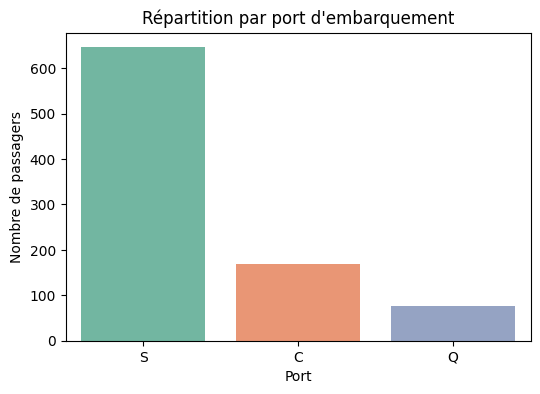

C:\Users\0203555F\AppData\Local\Temp\ipykernel_23872\4137324840.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FareCategory', data=df, palette="viridis")


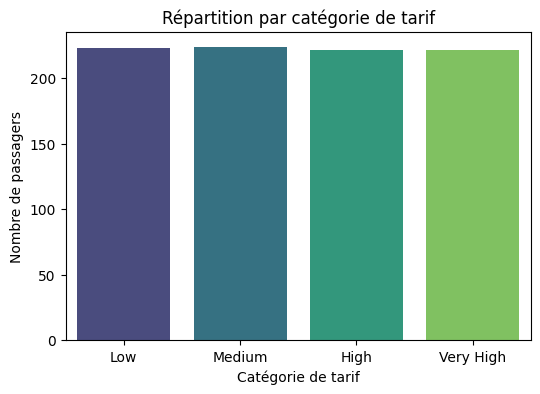

C:\Users\0203555F\AppData\Local\Temp\ipykernel_23872\4137324840.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsChild', data=df, palette="coolwarm")


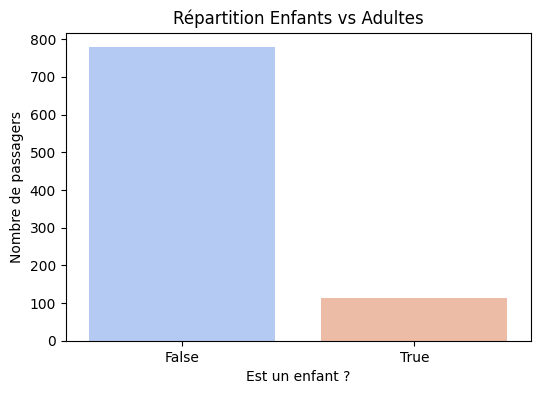

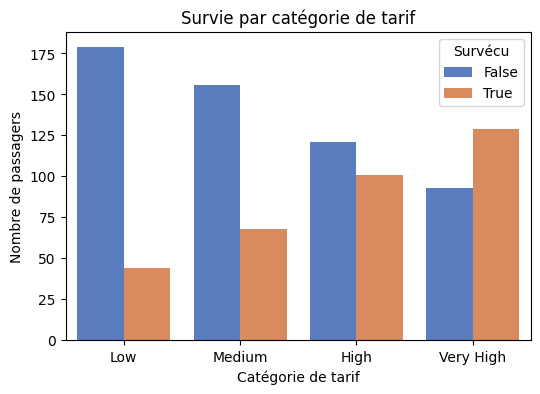

Matplotlib et Seaborn OK ✅
✅ Données exportées avec succès !


In [1]:
#👉 Tu es prêt pour commencer Jour 1 : Extraction.

#⚡ Plan de code pour ton notebook (Jour 1) :

import pandas as pd

# 1. Charger les données brutes
df = pd.read_csv("../data/raw/train.csv")

# 2. Aperçu des premières lignes
print(df.head())

# 3. Informations sur le dataset
print(df.info())

# 4. Dimensions (lignes, colonnes)
print("Shape:", df.shape)

# Sauvegarder une copie temporaire dans data/clean (optionnel Jour 1)
df.to_csv("../data/clean/train_copy.csv", index=False)


# ================================
# JOUR 2 : EXPLORATION DES DONNÉES
# ================================

# Statistiques descriptives (colonnes numériques)
print(df.describe())

# Valeurs manquantes par colonne
print(df.isnull().sum())

# Valeurs uniques pour certaines colonnes catégorielles
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())



# ================================
# JOUR 3 : NETTOYAGE DES DONNÉES
# ================================

# 1. Supprimer la colonne Cabin (trop de valeurs manquantes)
df = df.drop(columns=['Cabin'])

# 2. Remplacer les âges manquants par la médiane
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# 3. Remplacer les ports d’embarquement manquants par la valeur la plus fréquente
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

# 4. Convertir Survived en booléen (True = a survécu, False = n’a pas survécu)
df['Survived'] = df['Survived'].astype(bool)

# 5. Créer une nouvelle colonne IsChild (Age < 18)
df['IsChild'] = df['Age'] < 18

# 6. Créer une nouvelle colonne FareCategory (4 classes de prix)
df['FareCategory'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Vérification rapide du nouveau dataframe
print(df.info())
print(df.head())
print(df[['Age', 'Embarked', 'Survived', 'IsChild', 'Fare', 'FareCategory']].head())



import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# JOUR 4 : VALIDATION & VISUALISATION
# ================================

# 1. Vérifier les valeurs manquantes (doit être 0 partout maintenant)
print("Valeurs manquantes après nettoyage :")
print(df.isnull().sum())

# 2. Vérifier un échantillon de colonnes clés
print(df[['Age', 'Embarked', 'Survived', 'IsChild', 'Fare', 'FareCategory']].head())

# --------------------------
# VISUALISATIONS
# --------------------------

# Histogramme des âges
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=20, kde=True, color="skyblue")
plt.title("Distribution des âges des passagers")
plt.xlabel("Âge")
plt.ylabel("Nombre de passagers")
plt.show()

# Répartition des passagers par port d’embarquement
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', data=df, palette="Set2")
plt.title("Répartition par port d'embarquement")
plt.xlabel("Port")
plt.ylabel("Nombre de passagers")
plt.show()

# Répartition par catégorie de tarif
plt.figure(figsize=(6,4))
sns.countplot(x='FareCategory', data=df, palette="viridis")
plt.title("Répartition par catégorie de tarif")
plt.xlabel("Catégorie de tarif")
plt.ylabel("Nombre de passagers")
plt.show()

# Comparaison enfants/adultes
plt.figure(figsize=(6,4))
sns.countplot(x='IsChild', data=df, palette="coolwarm")
plt.title("Répartition Enfants vs Adultes")
plt.xlabel("Est un enfant ?")
plt.ylabel("Nombre de passagers")
plt.show()

# Survie en fonction de la catégorie de tarif
plt.figure(figsize=(6,4))
sns.countplot(x='FareCategory', hue='Survived', data=df, palette="muted")
plt.title("Survie par catégorie de tarif")
plt.xlabel("Catégorie de tarif")
plt.ylabel("Nombre de passagers")
plt.legend(title="Survécu")
plt.show()




import matplotlib.pyplot as plt
import seaborn as sns

print("Matplotlib et Seaborn OK ✅")


# ================================
# JOUR 5 : CHARGEMENT DES DONNÉES
# ================================

# Exporter les données nettoyées en CSV
df.to_csv("../data/clean/titanic_clean.csv", index=False)

# Exporter en Parquet (format optimisé)
df.to_parquet("../data/clean/titanic_clean.parquet", index=False)

print("✅ Données exportées avec succès !")



In [2]:
import sys
print(sys.executable)


c:\Users\0203555F\OneDrive - SNCF\Documents\Documents perso\Apprentissage DATA Engineer\PROJETS ETL\titanic_project\venv\Scripts\python.exe
